# DSA5102X Project: Analyzing Pokemon Dataset

Sohei Arisaka (A0228235H)

## Abstract
In this project, The Complete Pokemon Dataset and Pokemon Images Dataset are analyzed.
By using the datasets, we create machine learning models that predict primary type of pokemons from their other information.
In addition, we analyze pokemons' stats by using dimensional reduction.


# 1. Dataset

## 1.1. The Complete Pokemon Dataset
We use The Complete Pokemon Dataset from Kaggle ([link](https://www.kaggle.com/rounakbanik/pokemon)). 

>This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. 
The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. 

| Column| Description |
| :--- | :----------- |
|name| The English name of the Pokemon|
|japanese_name| The Original Japanese name of the Pokemon|
|pokedex_number| The entry number of the Pokemon in the National Pokedex|
|percentage_male| The percentage of the species that are male. Blank if the Pokemon is genderless.|
|type1| The Primary Type of the Pokemon|
|type2| The Secondary Type of the Pokemon|
|classification| The Classification of the Pokemon as described by the Sun and Moon Pokedex|
|height_m| Height of the Pokemon in metres|
|weight_kg| The Weight of the Pokemon in kilograms|
|capture_rate| Capture Rate of the Pokemon|
|baseeggsteps| The number of steps required to hatch an egg of the Pokemon|
|abilities| A stringified list of abilities that the Pokemon is capable of having|
|experience_growth| The Experience Growth of the Pokemon|
|base_happiness| Base Happiness of the Pokemon|
|against_?| Eighteen features that denote the amount of damage taken against an attack of a particular type|
|hp| The Base HP of the Pokemon|
|attack| The Base Attack of the Pokemon|
|defense| The Base Defense of the Pokemon|
|sp_attack| The Base Special Attack of the Pokemon|
|sp_defense| The Base Special Defense of the Pokemon|
|speed| The Base Speed of the Pokemon|
|generation| The numbered generation which the Pokemon was first introduced|
|is_legendary| Denotes if the Pokemon is legendary.|


In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# please use sklearn version >= 1.0
# version 0.24 seems to contain a bug in Kenerl PCA
import sklearn
print(sklearn.__version__) 
# sns.set()

1.0.1


Let us check the data with some visualizations. There are 801 pokemons.

In [2]:
df = pd.read_csv("pokemon.csv")
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


We analyze the relationship between types and base stats (hp, attack, defense, sp_attack, sp_defense, speed).
There are 18 types presented below.

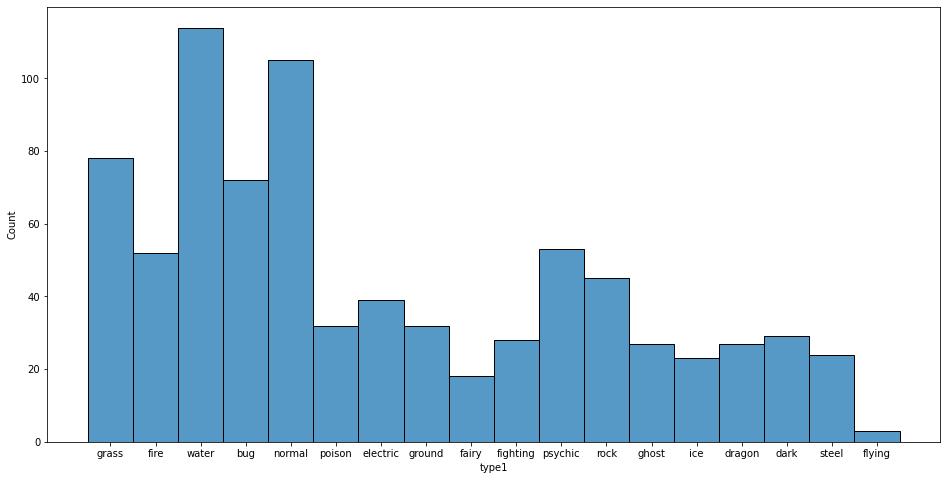

In [3]:
plt.figure(figsize=(16,8))
sns.histplot(data=df, x="type1");

In [4]:
base_stats = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]

First, we draw scatter plots.

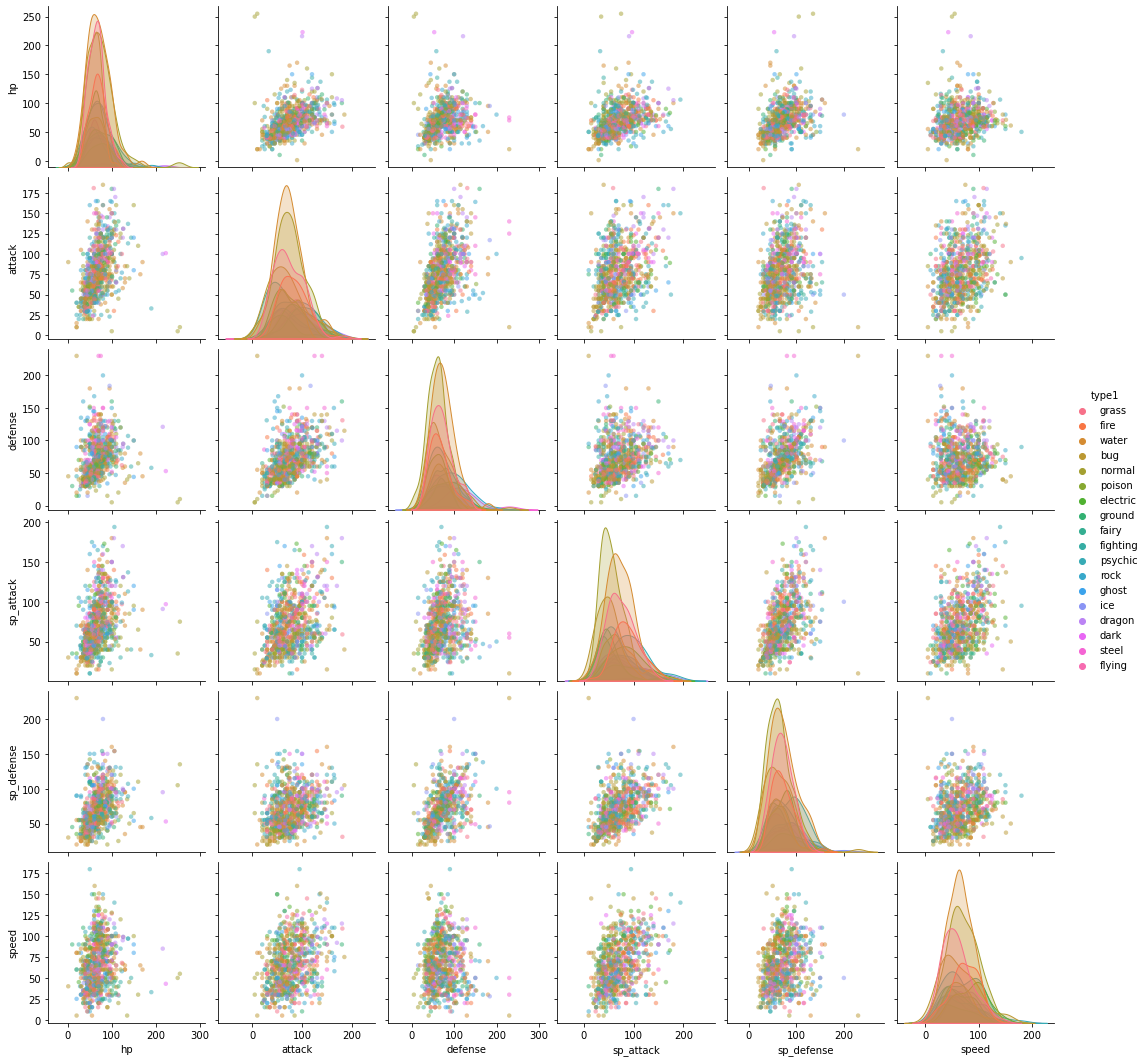

In [5]:
sns.pairplot(data = df[base_stats + ["type1"]],
             hue="type1",
             plot_kws={"alpha":0.5, "edgecolor":"none", "s":20});

It seems that each type has different stats distributions. Let us investigate the differences using box plots.

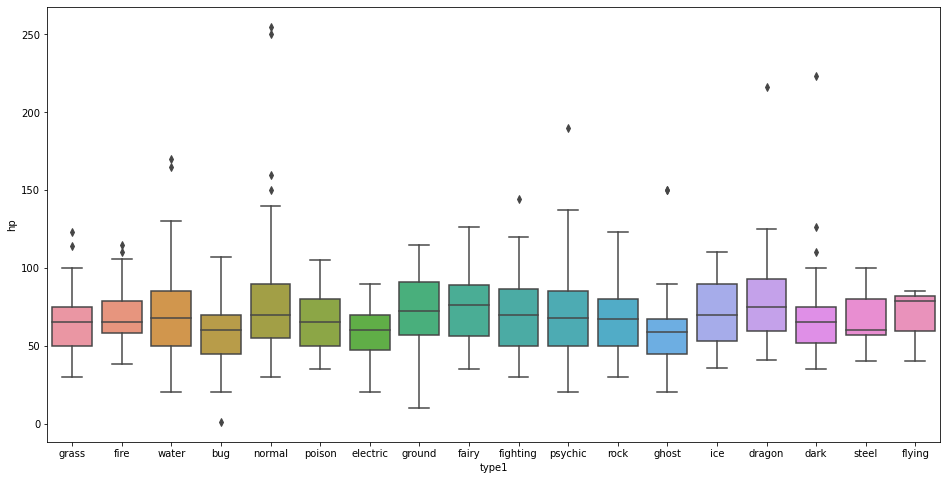

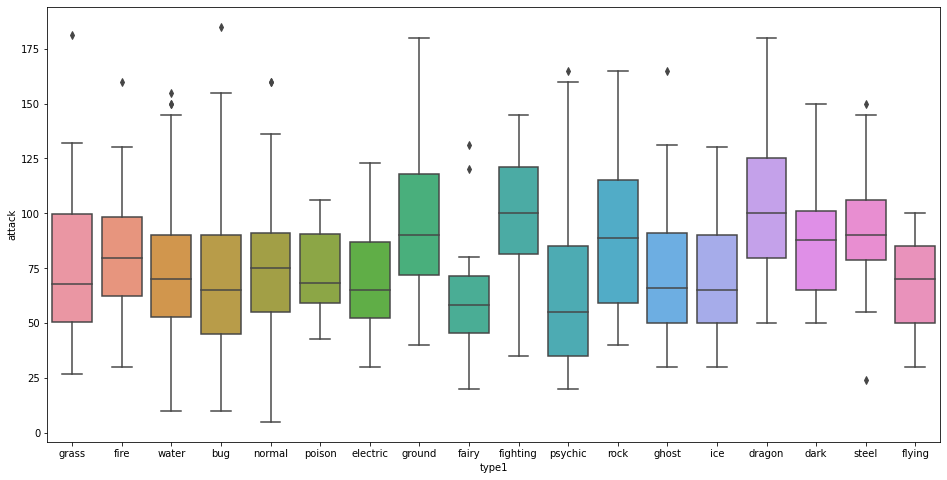

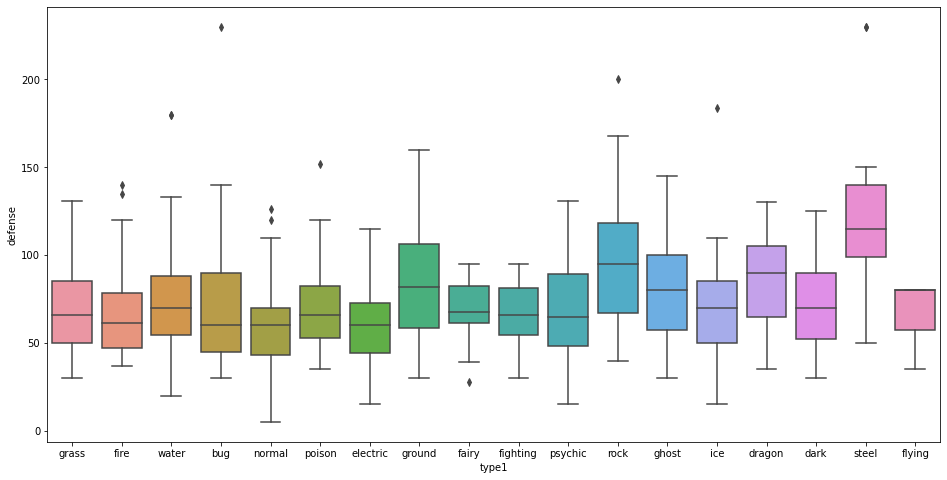

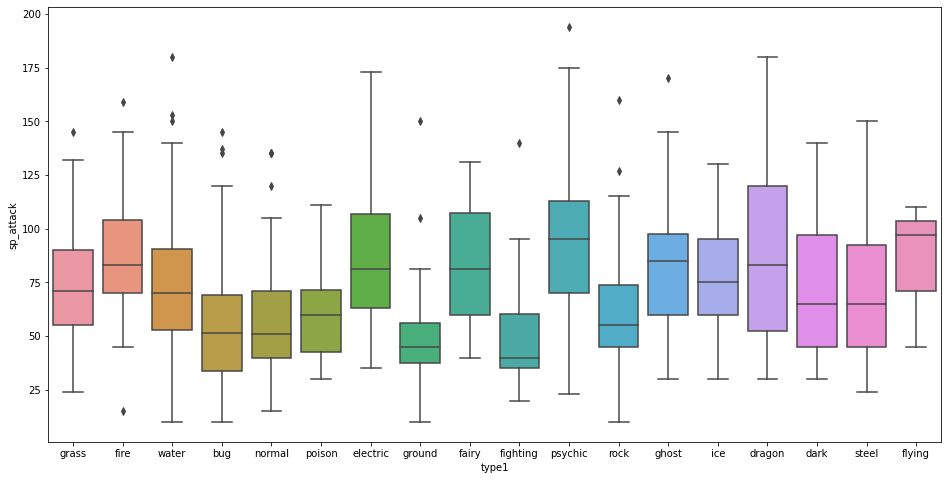

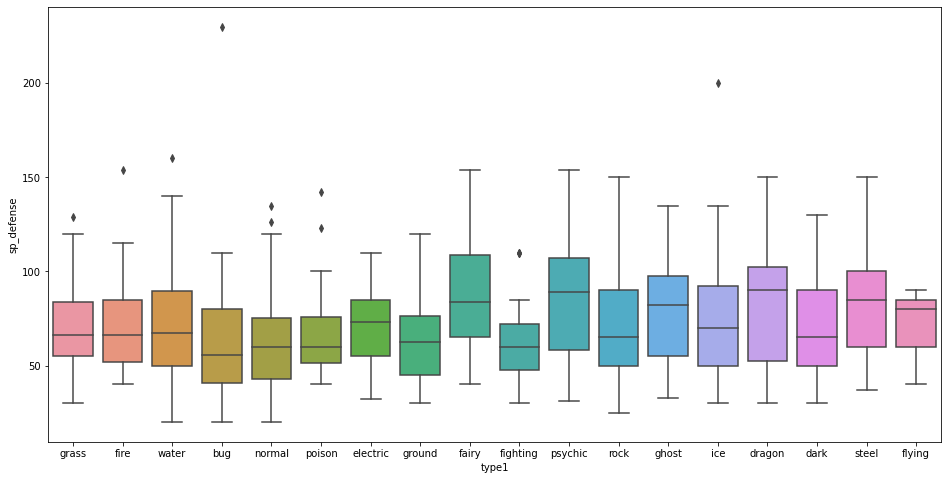

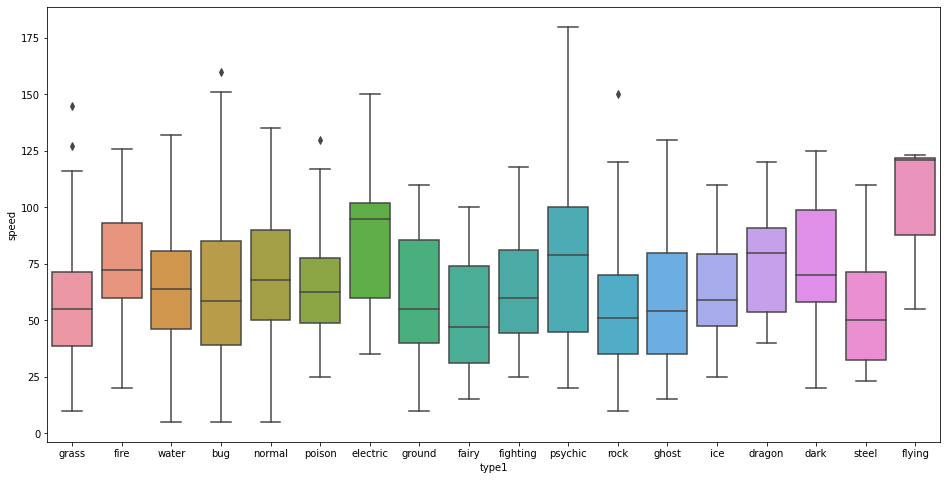

In [6]:
for param in base_stats:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=df, x="type1", y=param)
    plt.show()

From the violin plots, we can see some interesting characteristics. 
For example, fighting and dragon type have higher attack than the others.
Also, steel and rock type have higher defense than the others.
These tendencies match our intuition.

Lastly, we use radar charts to describe the charcteristic of each type.

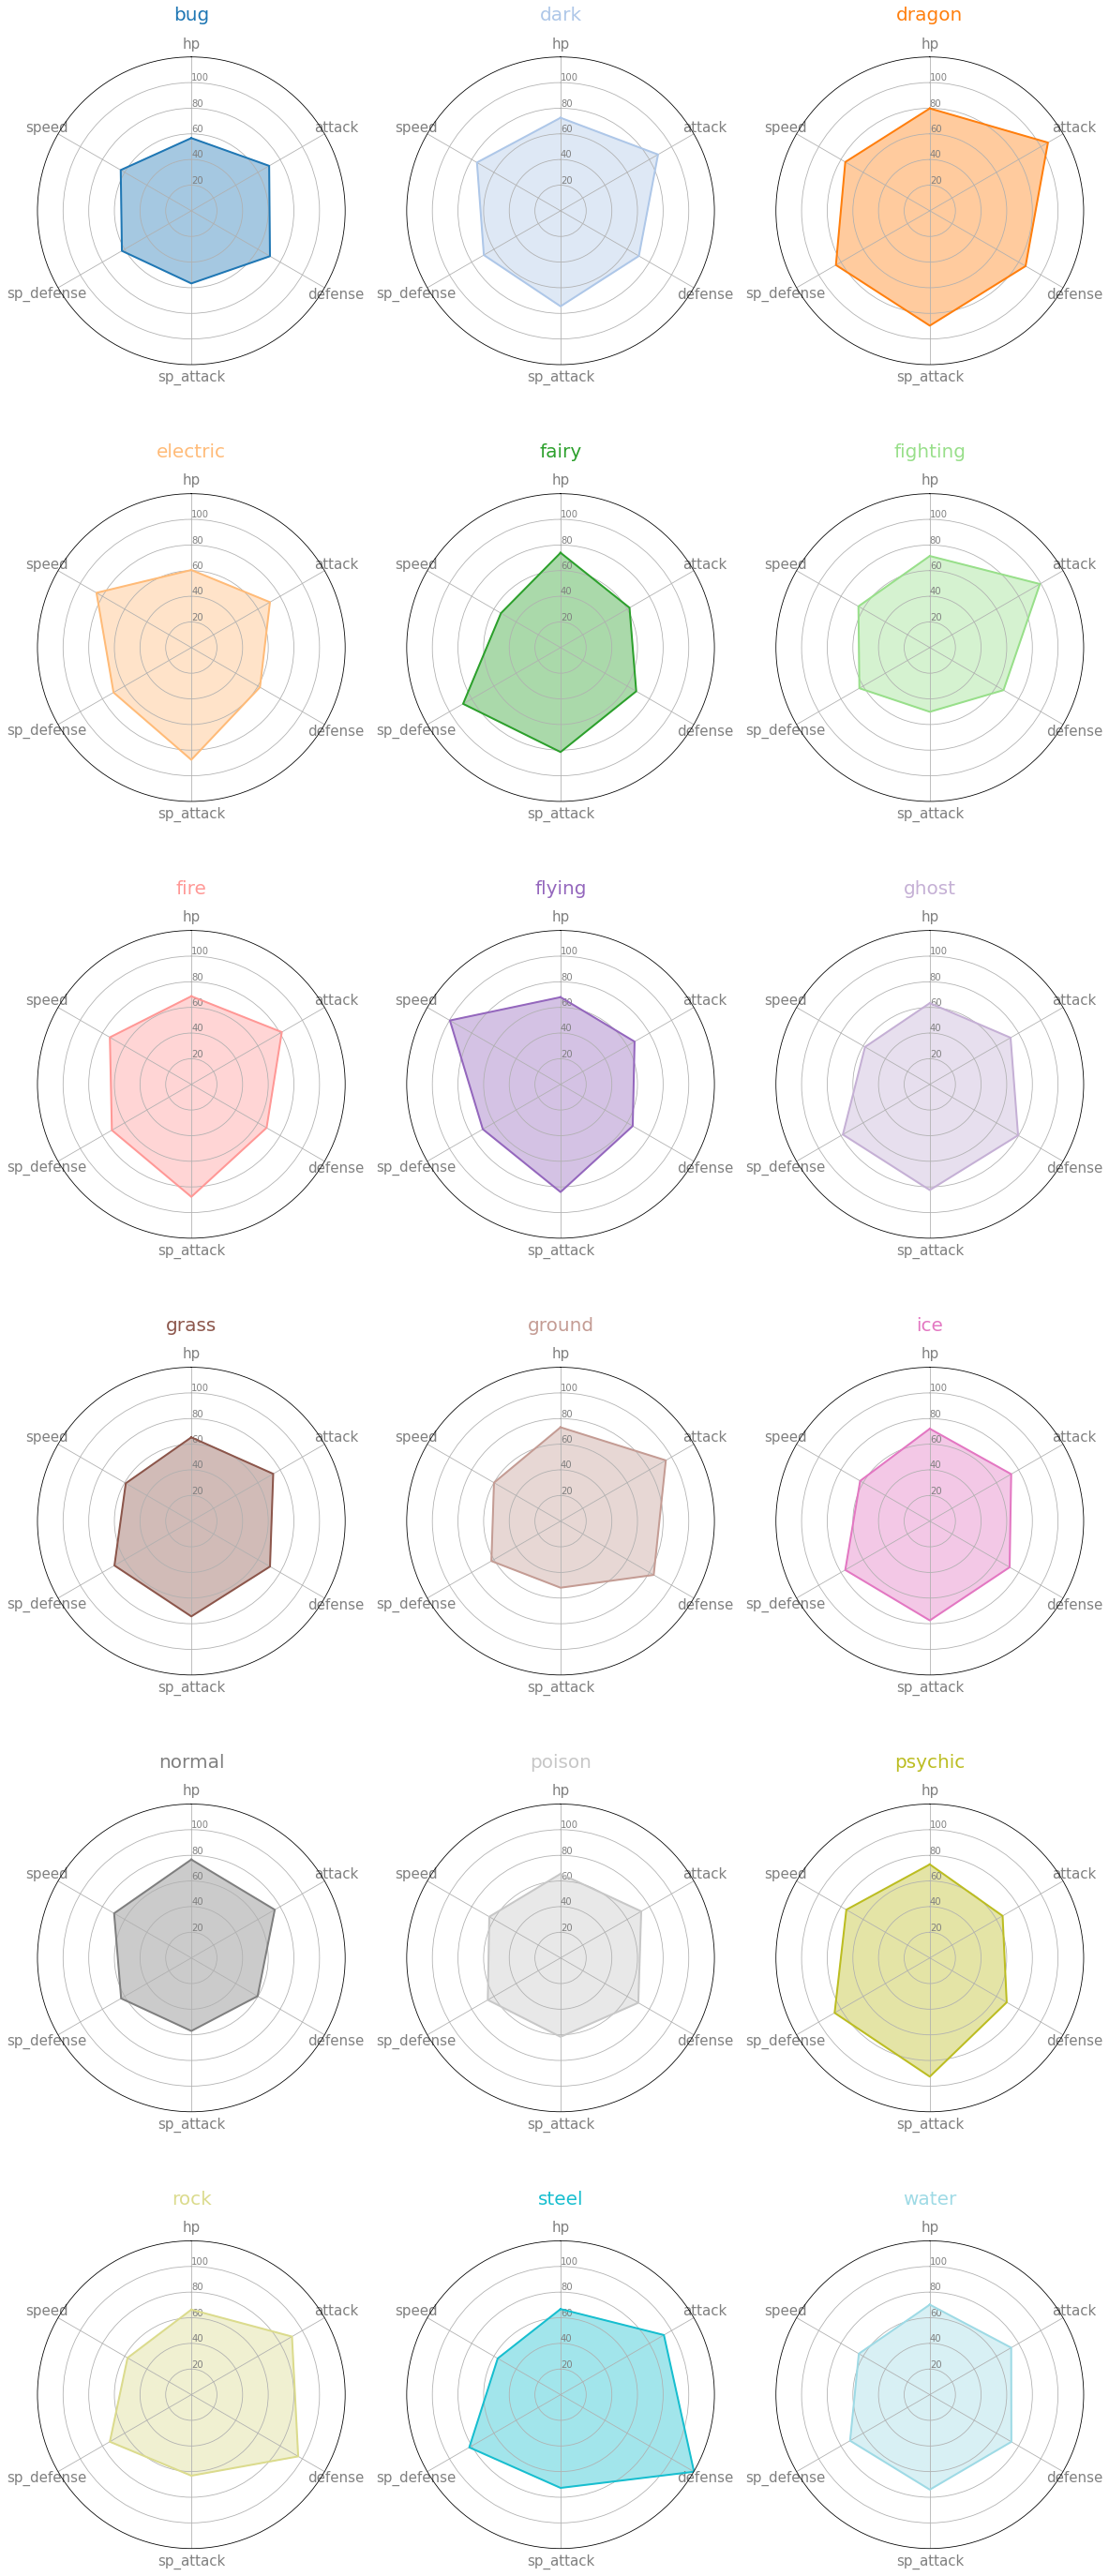

In [7]:
# Set data
df_mean = df.groupby("type1")[base_stats].mean().reset_index() # compute mean 

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df_mean)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(6,3,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=15)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60,80, 100], ["20","40","60", "80", "100"], color="grey", size=10)
    plt.ylim(0,120)

    # Ind1
    values=df_mean.loc[row].drop('type1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=20, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
plt.figure(figsize=(20, 50))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("tab20", len(df_mean.index))
 
# Loop to plot
for row in df_mean.index:
    make_spider( row=row, title=df_mean['type1'][row], color=my_palette(row))


## 1.2. Pokemon Images Dataset
In addition to The Complete Pokemon Dataset, we use Pokemon Images Dataset ([link](https://www.kaggle.com/kvpratama/pokemon-images-dataset)).
The images are stored in `./pokemon_jpg` directory.
The size of images is 256 by 256.
Let us see some pokemons.

Caterpie


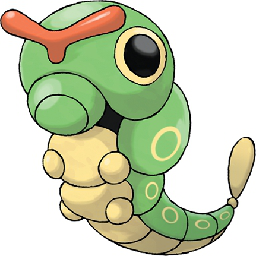

Voltorb


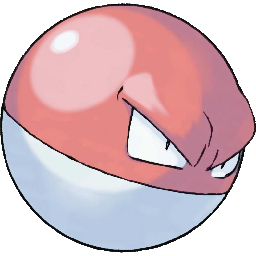

Skitty


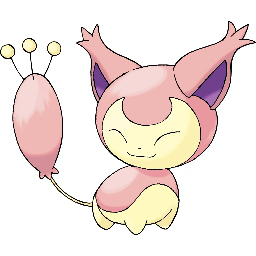

In [8]:
from PIL import Image
from IPython.display import display

img_dir = "./pokemon_jpg"
for poke_idx in [10, 100, 300]:
    img_path = os.path.join(img_dir, str(poke_idx) + '.jpg')
    im = Image.open(img_path)
    print(df.loc[poke_idx-1,"name"])
    display(im)

We use mean and std of RGB to represent the images.

In [9]:
from tqdm import tqdm

image_rgb = np.zeros((len(df), 6))
for i, poke_idx in tqdm(enumerate(df.pokedex_number)):
    path = os.path.join(img_dir, f"{poke_idx}.jpg")
    if os.path.isfile(path):
        image = np.array(Image.open(path))
        image_masked = np.ma.masked_equal(image, 255) # ignore white background
        image_rgb[i] = np.concatenate([np.mean(image_masked, axis=(0,1)), np.std(image_masked, axis=(0,1))], axis=0)
    else: # Images of some Pokemons are not included in the dataset
        image_rgb[i] = np.nan
image_rgb = pd.DataFrame(image_rgb, columns=["mean_r","mean_g", "mean_b","std_r","std_g", "std_b"])
df = pd.concat([df, image_rgb], axis=1)

801it [00:10, 76.89it/s]


Let us check the relationship between type and color of Pokemons. We can see some clear tendencies that suit our intuition. For example, fire pokemons tend to be red, and ice pokemons tend to be blue.

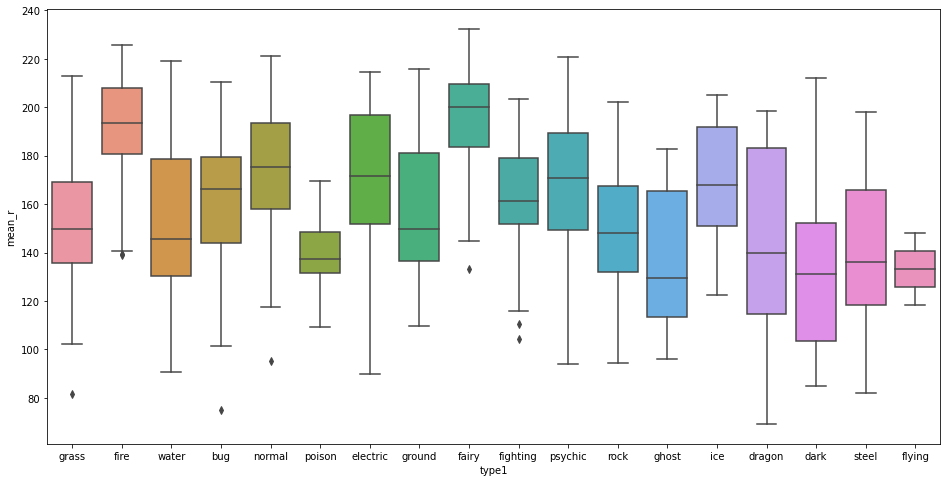

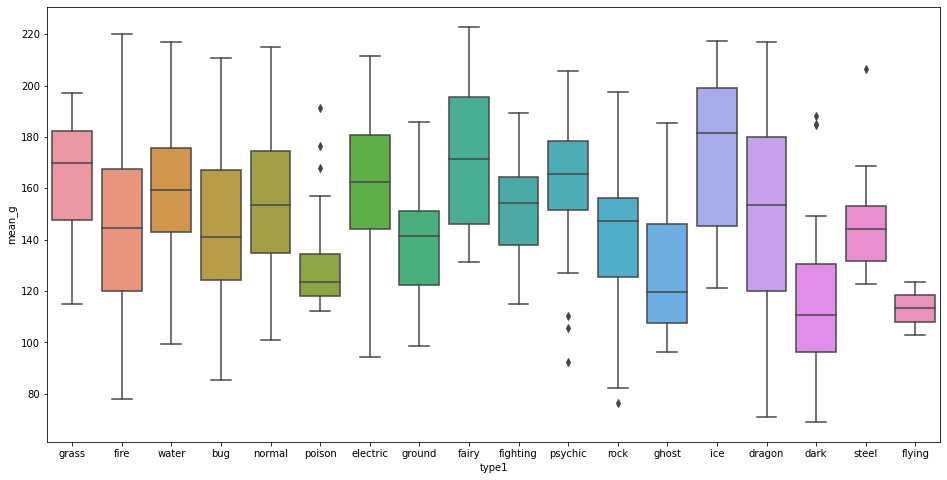

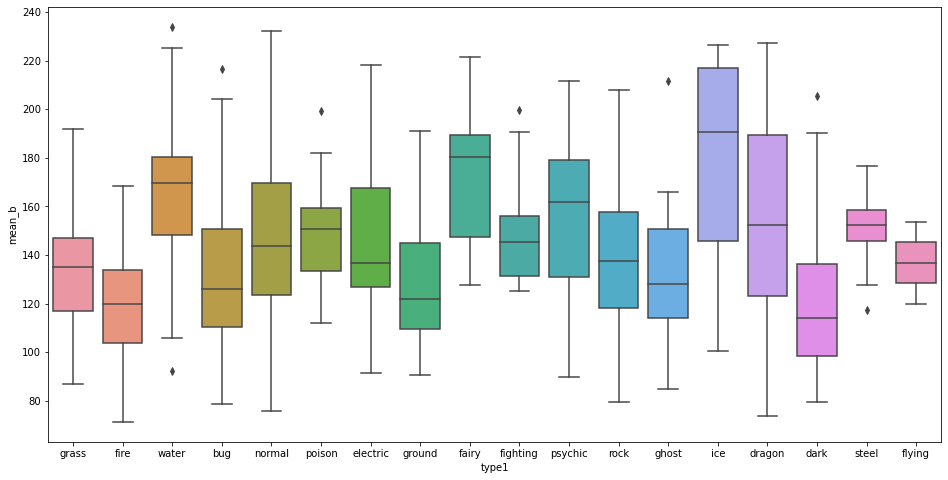

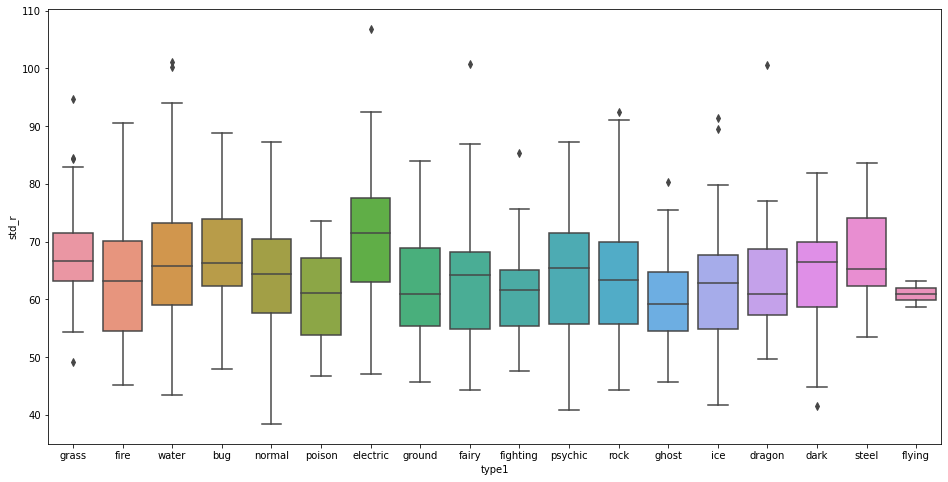

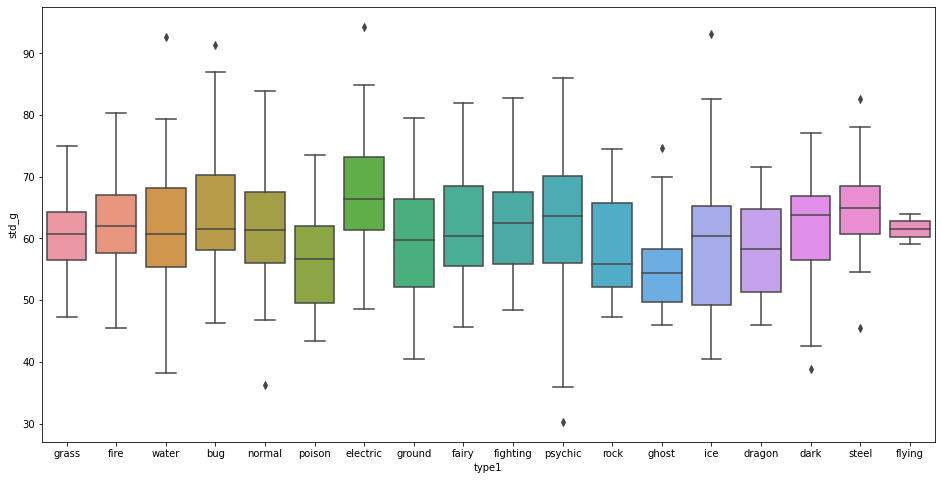

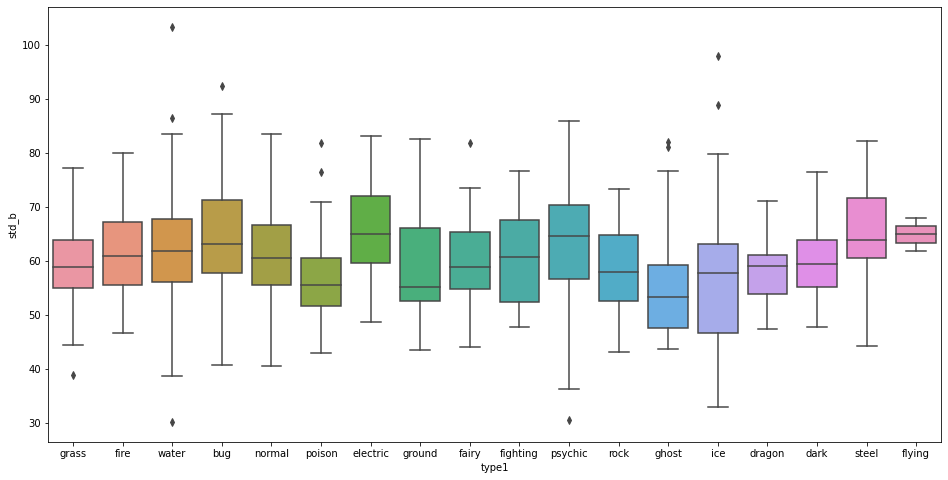

In [10]:
for color_feature in ["mean_r","mean_g", "mean_b","std_r","std_g", "std_b"]:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=df, x="type1", y=color_feature)
    plt.show()

# 2. Supervised learning
In this section, we consider a classification problem, which is to predict pokemon's primary type (`type1`) from their other information.

## 2.1 Preprocessing

In [11]:
# We do not use against_x because they are computed from type.
df = df.drop(['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water',], axis='columns')

df.capture_rate = df.capture_rate.replace('30 (Meteorite)255 (Core)', 30).astype(int)

We create some additional features.

In [12]:
df = pd.get_dummies(df, columns=['type2']) # one-hot encoding
df["num_abilities"] = list(map(len, df.abilities.str.split(","))) # count the number of abilities
df["len_name"] = list(map(len, df.name)) # length of name

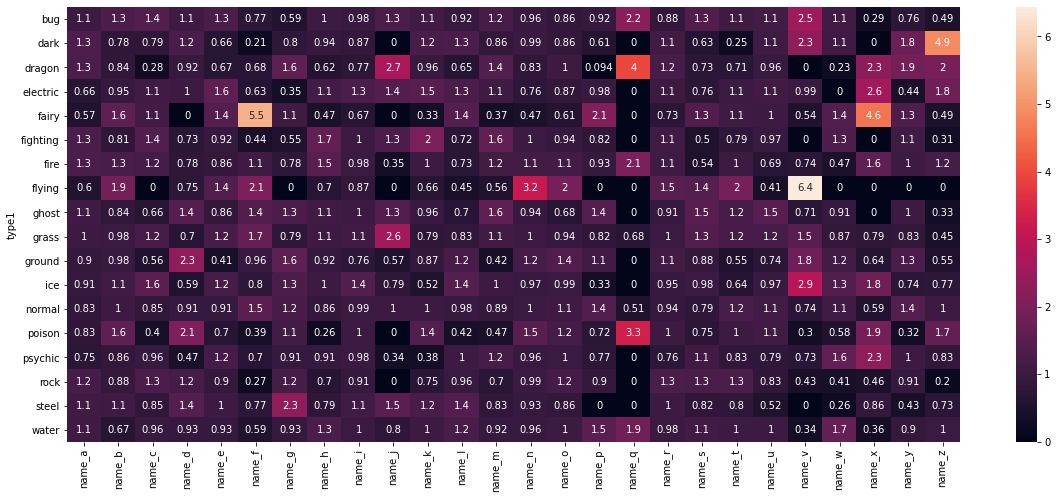

In [13]:
# count the number of alphabets in name
import string
alphabet_list = list(string.ascii_lowercase)
for alphabet in alphabet_list:
    df[f"name_{alphabet}"] = df.japanese_name.str.lower().str.count(alphabet) + df.name.str.lower().str.count(alphabet)

# interestingly, they are related to type of pokemons
plt.figure(figsize=(20,8))
sns.heatmap(df.groupby("type1").mean().loc[:,"name_a":] / df.loc[:,"name_a":].mean(), annot=True)
plt.show()

In [14]:
# split dataset to training set and test set using stratify option to keep target ratio
from sklearn.model_selection import train_test_split
X = df.loc[:, df.dtypes != object]
y = df.type1
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=df.type1,
                                                    shuffle=True,
                                                    test_size=0.2,
                                                    random_state=42)

## 2.2 Training models
We build three machine learning models (logistic regression: `LogisticRegression`, support vector machine: `SVC`, random forest: `RandomForest`) and one determisitic baseline (`DummyClassifier`) which returns the most frequent class (i.e. water).

### 2.2.1 Baseline
The accuracy of the deterministic model that returns the most frequent class is 14.2%.

train acc: 0.1421875
test acc: 0.14285714285714285


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


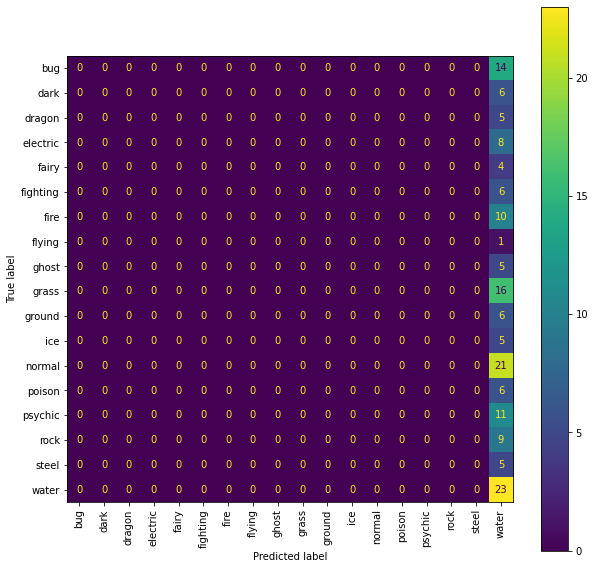

In [15]:
# baseline model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

model = Pipeline([("imputer",SimpleImputer()), ("scaler", StandardScaler()), ("clf", DummyClassifier(strategy="most_frequent"))])
model.fit(X_train, y_train)
print("train acc:", model.score(X_train, y_train))
print("test acc:", model.score(X_test, y_test))
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(model, X_test, y_test, ax=ax, xticks_rotation="vertical");

### 2.2.2 Logistic regression
First, we train the simplest classifier, logistic regression model.
Hyper-parameters are tuned by using cross validation.
The best model achieves 35.4% on the test set.

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

def train_model(model, params):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=cv)
    model.fit(X_train, y_train)

    print("best params", model.best_params_)
    print("train acc:", model.score(X_train, y_train))
    print("cv acc:", model.best_score_)
    print("test acc:", model.score(X_test, y_test))
    fig, ax = plt.subplots(figsize=(10,10))
    plot_confusion_matrix(model, X_test, y_test, ax=ax, xticks_rotation="vertical");
    return model

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


best params {'clf__C': 0.5, 'clf__class_weight': None, 'clf__penalty': 'l1'}
train acc: 0.6765625
cv acc: 0.378125
test acc: 0.35403726708074534


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


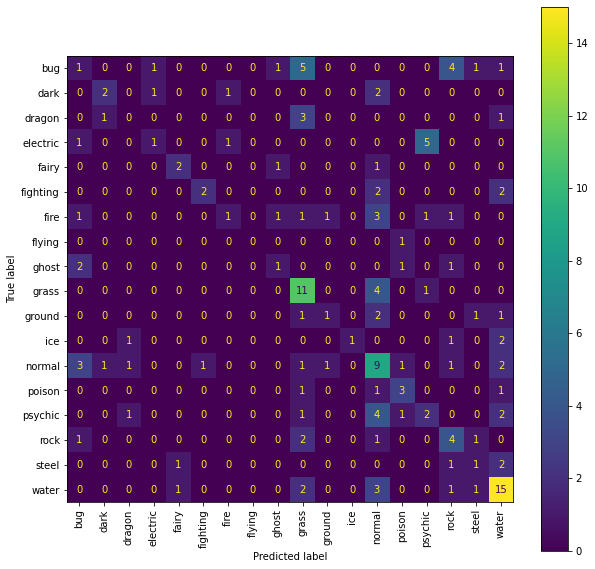

In [17]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

model = Pipeline([("imputer",SimpleImputer()), ("scaler", StandardScaler()), ("clf", LogisticRegression(max_iter=1000, solver='liblinear'))])
params = {'clf__C':[2**n for n in range(-5,5)], 'clf__penalty':['l1', 'l2'], 'clf__class_weight':["balanced", None]}
train_model(model, params);

### 2.2.3 Support vector machine
Next, we train support vector machine. 
Hyper-parameters are tuned by using cross validation.
The best model achieves 44.1% on the test set.

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


best params {'clf__C': 4, 'clf__class_weight': 'balanced', 'clf__kernel': 'rbf'}
train acc: 0.9859375
cv acc: 0.4390625
test acc: 0.4409937888198758


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


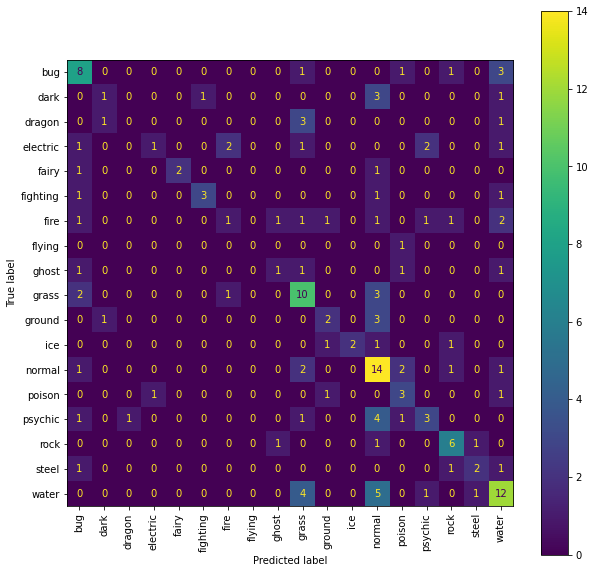

In [18]:
from sklearn.svm import SVC

model = Pipeline([("imputer",SimpleImputer()), ("scaler", StandardScaler()), ("clf", SVC())])
params = {'clf__C':[2**n for n in range(-10, 10)], 'clf__class_weight':["balanced", None], "clf__kernel":["rbf", "poly", "linear"]}
train_model(model, params);

### 2.2.4 Random forest
Finally, we train random forest model. 
Hyper-parameters are tuned by using cross validation.
The best model achieves 44.1% on the test set.

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


best params {'clf__class_weight': 'balanced', 'clf__max_depth': 15, 'clf__n_estimators': 625}
train acc: 1.0
cv acc: 0.4359375
test acc: 0.4409937888198758


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


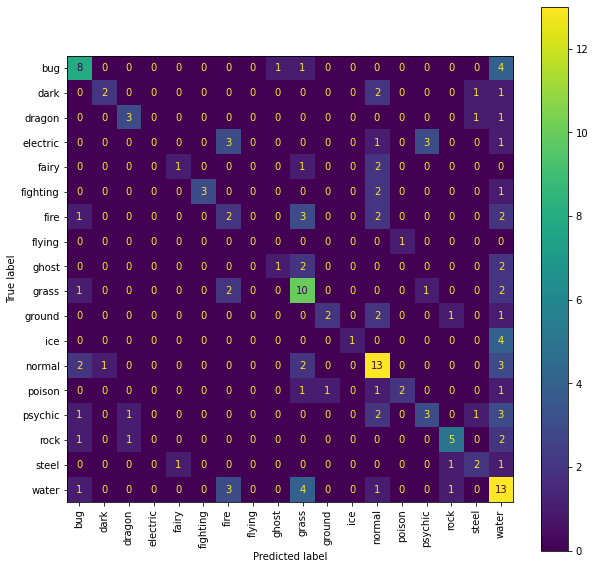

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([("imputer",SimpleImputer()), ("scaler", StandardScaler()), ("clf", RandomForestClassifier(random_state=42))])
params = {'clf__n_estimators':[5**n for n in range(1, 5)], 'clf__class_weight':["balanced", None], "clf__max_depth":range(5,20)}
train_model(model, params);

## 2.3 Discussion
The random forest model achieves the best accuracy 44.1% which is 29.9% better than the deterministic baseline. 
Although it is difficult to completely determine pokemon's type, the above results suggest that their other information, such as stats, color, and name, are related to their primary type, and machine learning model can predict it from the information to some extent.

To improve the accuracy, there are two possible directions.
One is increasing samples.
In fact, there are more than 100 pokemons that are not included in this dataset.
We can see that there is a large gap between training and test accuracy even of the best tuned model. 
This implies that the model has high variance, and there is a room for improvement by adding more samples.
The other is createing more sophisticated features.
For example, we can use a pretrained convolutional neural network as a feature extractor instead of simply taking mean and std of RGB.
Also, it is possible to use a language model to obtain a good embedding of pokemon's name.

# 3. Unsupervised learning
By using PCA and kernel PCA, we reduce the dimension of pokemon's base stats (hp, attack, defense, sp_attack, sp_defense, speed) from six to two and analyze the results.

To compare the performance of PCA and kernel PCA, we use `explained_variance_score` as the performance metric.
Usually, `PCA.expained_variance_ratio_` is used to evaluate the performance of PCA, but it is not appropriate for kernel PCA because kernel PCA changes the feature space if nonlinear kernel is used.
On the other hand, `explained_variance_score` can measure the performance in the same space for both PCA and kernel PCA.

In [20]:
base_stats = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
X = df[base_stats]
X

,hp,attack,defense,sp_attack,sp_defense,speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,100,123,122,120,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80
...,...,...,...,...,...,...
796,97,101,103,107,101,61
797,59,181,131,59,31,109
798,223,101,53,97,53,43
799,97,107,101,127,89,79


## 3.1 PCA
PCA reduces the dimension with explained_variance_score of 0.613.
Note that `MinMaxScaler` is used before PCA.


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

pca = Pipeline([("scaler", MinMaxScaler()), ("pca", PCA(n_components=2))])
X_reduced = pca.fit_transform(X)
evs = explained_variance_score(X, pca.inverse_transform(X_reduced))
print(f"PCA variance = {evs:.3f}")

PCA variance = 0.613


Let us check the principal components.

The first component has positive coefficients for all base stats.
Thus, we would say that the first component represents total strength of each pokemon.

The second component has a large positive coefficient on defense while a negative coefficient on speed.
Thus, this component seems to imply whether the pokemon is a haste type or defensive type.

Text(0.5, 1.0, 'Second Principal Component Axis')

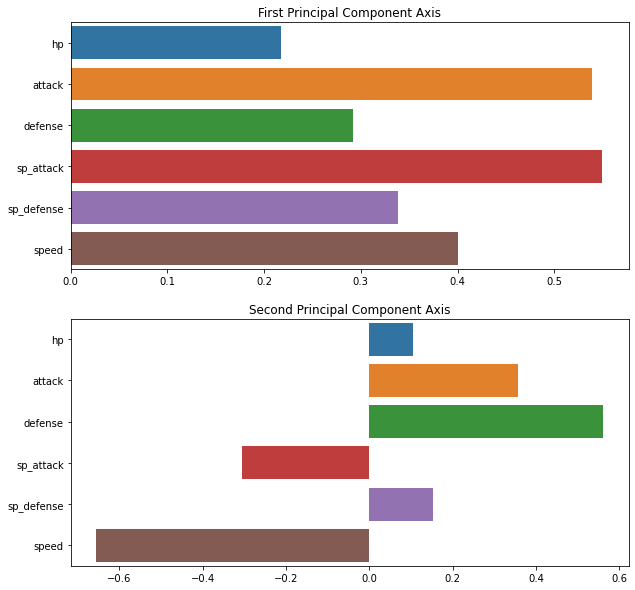

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(x=pca["pca"].components_[0], y=X.columns, orient='h', ax=ax[0])
sns.barplot(x=pca["pca"].components_[1], y=X.columns, orient='h', ax=ax[1])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')

From scatter plot, we can see that legendary pokemons are stronger than other normal pokemons in general.

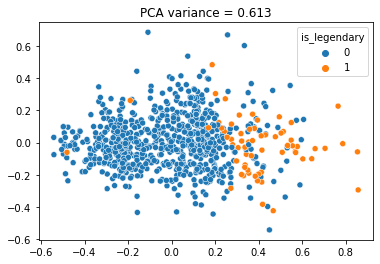

In [23]:
sns.scatterplot(x=X_reduced[:,0], y= X_reduced[:,1], hue=df.is_legendary)
plt.title(f"PCA variance = {evs:.3f}")
plt.show()

### 3.2 Kernel PCA
Kernel PCA reduces the dimension with explained_variance_score of 0.631.
To tune hyperparameters, grid search is used.

In [24]:
from sklearn.decomposition import KernelPCA

def my_scorer(estimator, X, y=None):
    X_reduced = estimator.fit_transform(X)
    X_reconst = estimator.inverse_transform(X_reduced)
    return explained_variance_score(X, X_reconst)
    
params = {
    'kpca__kernel':["poly", "rbf", "sigmoid", "cosine"],
    'kpca__gamma':[2**n for n in range(-10, 5)],
    'kpca__degree':[2, 3, 4]}

kpca = Pipeline([("scaler", MinMaxScaler()),
 ("kpca", KernelPCA(n_components=2, fit_inverse_transform=True))])
kpca = GridSearchCV(kpca, params, scoring=my_scorer, n_jobs=-1)

kpca = kpca.fit(X)
kpca_best = kpca.best_estimator_.fit(X)
X_reduced = kpca_best.transform(X)
evs = explained_variance_score(X, kpca_best.inverse_transform(X_reduced))
print(f"Kernel PCA variance = {evs:.3f}")

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 679, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_kernel_pca.py", line 430, in fit
    self._fit_inverse_transform(X_transformed, X)
  File "/opt/conda/lib/pyt

Kernel PCA variance = 0.631


Note that although the performance of kernel PCA is slightly better than PCA, it is very sensitive to hyperparameters.
In addition, the structure of reduced data seems similar.
Since it is difficult to interpret compared to PCA and sensitive to hyperparameters, PCA seems more appropriate for this task.

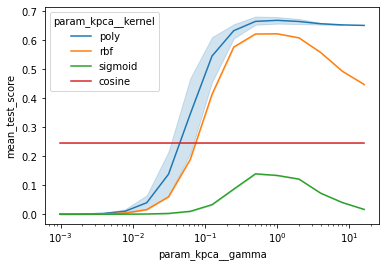

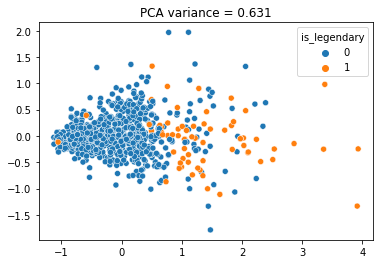

In [25]:
# hyper-parameters vs performance
res = pd.DataFrame(kpca.cv_results_)
ax = sns.lineplot(data=res, x="param_kpca__gamma", y="mean_test_score", hue="param_kpca__kernel")
ax.set_xscale("log")
plt.show()

# scatter plot of reduced data
sns.scatterplot(x=X_reduced[:,0], y= X_reduced[:,1], hue=df.is_legendary)
plt.title(f"PCA variance = {evs:.3f}")
plt.show()